%matplotlib inline


# Εργασία Εργαστηρίου: Δημιουργία Μηχανής Αναζήτησης

# Δημήτρης Σκούφης - 21390317

## Περιγραφή
Στην εργασία αυτή, αναπτύσσουμε μια απλή μηχανή αναζήτησης με σκοπό την κατανόηση των θεμελιωδών εννοιών της ανάκτησης πληροφορίας, της ευρετηρίασης, 
της κατάταξης και της αναζήτησης. Το notebook περιλαμβάνει τα βήματα:
1. Συλλογή δεδομένων από το Wikipedia.
2. Προεπεξεργασία κειμένου.
3. Προετοιμασία για ευρετηρίαση (θα ακολουθήσει).

---
## Βήμα 1: Συλλογή Δεδομένων

**Σκοπός:** Συλλογή άρθρων από το Wikipedia, τα οποία θα αποτελέσουν το dataset για τη μηχανή αναζήτησης.

**Περιγραφή:**
- Χρησιμοποιούμε τη βιβλιοθήκη `BeautifulSoup` για τη λήψη περιεχομένου από άρθρα.
- Αποθηκεύουμε το περιεχόμενο σε μορφή JSON για μελλοντική χρήση.




# Βήμα 1: Δημιουργία Dataset

Ακολουθεί η λίστα με τα URLs των άρθρων από το Wikipedia, τα οποία επιλέχθηκαν για να παρέχουν ποικιλία σε κατηγορίες όπως επιστήμη, ιστορία, και τεχνολογία.


In [ ]:
# Λίστα URLs για συλλογή άρθρων από Wikipedia
wikipedia_urls = [
    "https://en.wikipedia.org/wiki/Quantum_mechanics",
    "https://en.wikipedia.org/wiki/Artificial_intelligence",
    "https://en.wikipedia.org/wiki/Space_exploration",
    "https://en.wikipedia.org/wiki/Computer_network",
    "https://en.wikipedia.org/wiki/French_Revolution",
    "https://en.wikipedia.org/wiki/World_War_II",
    "https://en.wikipedia.org/wiki/Ancient_Greece",
    "https://en.wikipedia.org/wiki/Renaissance",
    "https://en.wikipedia.org/wiki/Seven_Wonders_of_the_World",
    "https://en.wikipedia.org/wiki/Great_Barrier_Reef",
    "https://en.wikipedia.org/wiki/Amazon_rainforest",
    "https://en.wikipedia.org/wiki/Sahara",
    "https://en.wikipedia.org/wiki/Classical_music",
    "https://en.wikipedia.org/wiki/Impressionism",
    "https://en.wikipedia.org/wiki/Film",
    "https://en.wikipedia.org/wiki/Homer",
    "https://en.wikipedia.org/wiki/Evolution",
    "https://en.wikipedia.org/wiki/Human_anatomy",
    "https://en.wikipedia.org/wiki/Climate",
    "https://en.wikipedia.org/wiki/Biodiversity",
    "https://en.wikipedia.org/wiki/Sustainable_development",
    "https://en.wikipedia.org/wiki/Globalization",
    "https://en.wikipedia.org/wiki/Blockchain",
    "https://en.wikipedia.org/wiki/Financial_crisis_of_2007–2008",
    "https://en.wikipedia.org/wiki/Vaccine",
    "https://en.wikipedia.org/wiki/Mental_health",
    "https://en.wikipedia.org/wiki/Nutrition",
    "https://en.wikipedia.org/wiki/Pandemic"
]



# Δημιουργία Web Crawler

**Περιγραφή:** Το παρακάτω script χρησιμοποιεί τη βιβλιοθήκη `BeautifulSoup` για να συλλέξει δεδομένα από τη λίστα των URLs. 
Το περιεχόμενο κάθε άρθρου (τίτλος, URL, περιεχόμενο) αποθηκεύεται σε ένα αρχείο JSON.


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

# Λίστα URLs για συλλογή άρθρων από Wikipedia
wikipedia_urls = [
    "https://en.wikipedia.org/wiki/Quantum_mechanics",
    "https://en.wikipedia.org/wiki/Artificial_intelligence",
    "https://en.wikipedia.org/wiki/Space_exploration",
    "https://en.wikipedia.org/wiki/Computer_network",
    "https://en.wikipedia.org/wiki/French_Revolution",
    "https://en.wikipedia.org/wiki/World_War_II",
    "https://en.wikipedia.org/wiki/Ancient_Greece",
    "https://en.wikipedia.org/wiki/Renaissance",
    "https://en.wikipedia.org/wiki/Seven_Wonders_of_the_World",
    "https://en.wikipedia.org/wiki/Great_Barrier_Reef",
    "https://en.wikipedia.org/wiki/Amazon_rainforest",
    "https://en.wikipedia.org/wiki/Sahara",
    "https://en.wikipedia.org/wiki/Classical_music",
    "https://en.wikipedia.org/wiki/Impressionism",
    "https://en.wikipedia.org/wiki/Film",
    "https://en.wikipedia.org/wiki/Homer",
    "https://en.wikipedia.org/wiki/Evolution",
    "https://en.wikipedia.org/wiki/Human_anatomy",
    "https://en.wikipedia.org/wiki/Climate",
    "https://en.wikipedia.org/wiki/Biodiversity",
    "https://en.wikipedia.org/wiki/Sustainable_development",
    "https://en.wikipedia.org/wiki/Globalization",
    "https://en.wikipedia.org/wiki/Blockchain",
    "https://en.wikipedia.org/wiki/Financial_crisis_of_2007–2008",
    "https://en.wikipedia.org/wiki/Vaccine",
    "https://en.wikipedia.org/wiki/Mental_health",
    "https://en.wikipedia.org/wiki/Nutrition",
    "https://en.wikipedia.org/wiki/Pandemic"
]


# Συνάρτηση για συλλογή δεδομένων από άρθρο Wikipedia
def fetch_wikipedia_article(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Έλεγχος αν η σελίδα είναι προσβάσιμη

        soup = BeautifulSoup(response.content, 'html.parser')

        # Τίτλος άρθρου
        title = soup.find('h1').text

        # Περιεχόμενο άρθρου (παράγραφοι)
        paragraphs = soup.find_all('p')
        content = '\n'.join([p.text for p in paragraphs if p.text])

        return {'title': title, 'url': url, 'content': content}

    except Exception as e:
        print(f"Error fetching article from {url}: {e}")
        return None

# Συλλογή δεδομένων από τα URLs
collected_articles = []

for url in wikipedia_urls:
    article = fetch_wikipedia_article(url)
    if article:
        collected_articles.append(article)

# Αποθήκευση δεδομένων σε JSON αρχείο
output_file = 'wikipedia_articles.json'
with open(output_file, 'w', encoding='utf-8') as file:
    json.dump(collected_articles, file, indent=4, ensure_ascii=False)

print(f"Articles saved successfully to {output_file}")



## Αποτελέσματα Βήματος 1

Η εκτέλεση του παραπάνω κώδικα δημιούργησε το αρχείο `wikipedia_articles.json` με τα εξής χαρακτηριστικά:
- Αποθηκεύει δεδομένα από 28 άρθρα.
- Περιλαμβάνει πληροφορίες όπως τίτλος, URL και περιεχόμενο.

Παρακάτω φαίνεται ένα στιγμιότυπο της επιτυχούς εκτέλεσης:

![success!](images/Στιγμιότυπο%20οθόνης%202025-01-11%20151157.png)


Η εκτέλεση έγινε με επιτυχία και δημιουργήθηκε το αρχείο wikipedia_articles.json

![success!](images/Στιγμιότυπο%20οθόνης%202025-01-11%20151157.png "soup is ready")

# Βήμα 2:  Προεπεξεργασία Κειμένου (Text Processing)

# Καθαρισμός και επεξεργασία κειμένου για να είναι έτοιμο για αναζήτηση

Θα εφαρμόσω tokenization, lemmatization, stop-word removal, καθαρισμός ειδικών χαρακτήρων


# Βήμα 2: Προεπεξεργασία Κειμένου

**Σκοπός:** Καθαρισμός και επεξεργασία κειμένου ώστε να είναι κατάλληλο για αναζήτηση και ευρετηρίαση.

**Εργασίες που εκτελούνται:**
1. Μετατροπή κειμένου σε πεζά.
2. Αφαίρεση ειδικών χαρακτήρων.
3. Διαχωρισμός σε tokens (tokenization).
4. Αφαίρεση λέξεων-κλειδιών (stop-word removal).
5. Εύρεση βασικής μορφής λέξεων (lemmatization).

Παρακάτω εφαρμόζονται τα παραπάνω βήματα στα δεδομένα που συλλέξαμε.



## Αποτελέσματα Βήματος 2

Μετά την επεξεργασία, δημιουργούνται:
1. **`processed_articles.json`**: Περιέχει τα καθαρισμένα δεδομένα με tokens για κάθε άρθρο.
2. **`articles_metadata.json`**: Περιέχει μεταδεδομένα όπως:
   - Αριθμός tokens
   - Αριθμός μοναδικών tokens

Παρακάτω φαίνονται παραδείγματα αποτελεσμάτων:
- **Πριν την επεξεργασία:** Το κείμενο περιλαμβάνει ειδικούς χαρακτήρες, κεφαλαία κ.λπ.
- **Μετά την επεξεργασία:** Το κείμενο καθαρίζεται και διαχωρίζεται σε tokens.


![success!](images/Βήμα2.png "proccessing is ready")

# Βήμα 3: Ευρετήριο (Indexing)

1. Σχεδιασμός και υλοποιήση: Δημιουργία δομής δεδομένων για αντιστοίχιση λέξεων με τα έγγραφα στα οποία εμφανίζονται

2. Αποθήκευση: Υλοποίηση αποδοτικής μεθόδου αποθήκευσης για την παραπάνω δομή

# Σχεδιασμός Ευρετηρίου

Το ανεστραμμένο ευρετήριο θα είναι μια Python dict όπου:

Τα κλειδιά θα είναι οι μοναδικές λέξεις (tokens) από τα προεπεξεργασμένα άρθρα.
Οι τιμές θα είναι λίστες με ID άρθρων που περιέχουν αυτή τη λέξη.

In [ ]:
import json
from collections import defaultdict

# Φόρτωση των προεπεξεργασμένων άρθρων
with open('processed_articles.json', 'r', encoding='utf-8') as file:
    processed_articles = json.load(file)

# Δημιουργία του ανεστραμμένου ευρετηρίου
inverted_index = defaultdict(list)

for article_id, article in enumerate(processed_articles):
    for token in set(article['tokens']):
        inverted_index[token].append(article_id)

# Αποθήκευση του ευρετηρίου σε αρχείο
with open('inverted_index.json', 'w', encoding='utf-8') as file:
    json.dump(inverted_index, file, indent=4, ensure_ascii=False)

print("Inverted index created and saved successfully.")


## Αποτελέσματα βήματος 3

1. Περιγραφή Σχεδιασμού: Η χρήση defaultdict επιτρέπει εύκολη εισαγωγή νέων λέξεων χωρίς πρόσθετους ελέγχους
2. Αποδοτικότητα: Το ευρετήριο αποθηκεύεται σε JSON μορφή για να είναι φορητό και αναγνώσιμο

## Παραδείγματα Δεδομένων

* Λέξη: "quantum" -> [0, 1, 2] (IDs άρθρων που περιέχουν τη λέξη)

![success!](images/Βήμα3.png "proccessing is ready")

# Αλλαγή Dataset

## Άρθρα για το Marvel Cinematic Universe

Αποφάσισα να αλλάξω Dataset γιατί άρχισε να αποκτάει ενδιαφέρον

PS D:\Downloads\Uni\Ανάκτηση Πληροφορίας\Εργασία> python search_interface.py
Welcome to the Search Engine!
Enter your query (or type 'exit' to quit):

> hulk

Choose retrieval method:
1. Boolean Retrieval (AND, OR, NOT)
2. Vector Space Model (VSM)
3. Okapi BM25

Enter your choice (1/2/3): 2
VSM Query Tokens: ['hulk']

Top Results:
- Marvel Cinematic Universe (Score: 1.0000)
- Marvel Studios (Score: 1.0000)
- Iron Man (2008 film) (Score: 1.0000)
- The Incredible Hulk (film) (Score: 1.0000)
- Thor (film) (Score: 1.0000)

> iron man

Choose retrieval method:
1. Boolean Retrieval (AND, OR, NOT)
2. Vector Space Model (VSM)
3. Okapi BM25

Enter your choice (1/2/3): 1

Available Boolean operations: AND, OR, NOT
Enter Boolean operation: AND
Query Tokens: ['iron', 'man']

Top Results:
- Marvel Cinematic Universe
- Marvel Studios
- Iron Man (2008 film)
- The Incredible Hulk (film)
- Iron Man 2
- Thor (film)
- Captain America: The First Avenger
- The Avengers (2012 film)
- Iron Man 3
- Thor: The Dark World
- Captain America: The Winter Soldier
- Guardians of the Galaxy (film)
- Avengers: Age of Ultron
- Ant-Man (film)
- Captain America: Civil War
- Guardians of the Galaxy Vol. 2
- Spider-Man: Homecoming
- Black Panther (film)
- Avengers: Infinity War
- Captain Marvel (film)
- Avengers: Endgame
- Spider-Man: Far From Home
- Black Widow (2021 film)
- Shang-Chi and the Legend of the Ten Rings
- Eternals (film)
- Doctor Strange in the Multiverse of Madness
- WandaVision
- The Falcon and the Winter Soldier
- Moon Knight (miniseries)
- Ironheart (miniseries)

>

# Βήμα 5: Αξιολόγηση Συστήματος

## Δημιουργία Ground Truth Αρχείου

Δημιούργησα ένα JSON αρχείο με όνομα ground_thruth.json

Αποφάσισα να έχει αυτές τις λέξεις

10 Λέξεις/Φράσεις σχετικές με Marvel

hulk

iron man

thor

avengers

captain america

black panther

infinity stones

guardians of the galaxy

loki

multiverse


## Δημιουργία του αρχείου

In [ ]:
import json

with open('processed_articles.json', 'r', encoding='utf-8') as file:
    processed_articles = json.load(file)

# Λίστα ερωτημάτων
queries = {
    "hulk": [],
    "iron man": [],
    "thor": [],
    "avengers": [],
    "captain america": [],
    "black panther": [],
    "infinity stones": [],
    "guardians of the galaxy": [],
    "loki": [],
    "multiverse": []
}

# Δημιουργία του ground truth χειροκίνητα
for query in queries.keys():
    for article_id, article in enumerate(processed_articles):
        if query in article['title'].lower() or query in " ".join(article['tokens']).lower():
            queries[query].append(article_id)

# Αποθήκευση του ground truth
with open('ground_truth.json', 'w', encoding='utf-8') as file:
    json.dump(queries, file, indent=4, ensure_ascii=False)

print("Ground truth created and saved as 'ground_truth.json'.")


Αυτό το αρχείο παίρνει το αρχείο με τα επεξεργασμένα άρθρα και μαζεύει τα IDs για τις λέξεις που επέλεξα

# Διαγράμματα αποτελεσμάτων

## Βλέπουμε παρακάτω τα αποτελέσματα από την μηχανή αναζήτησης

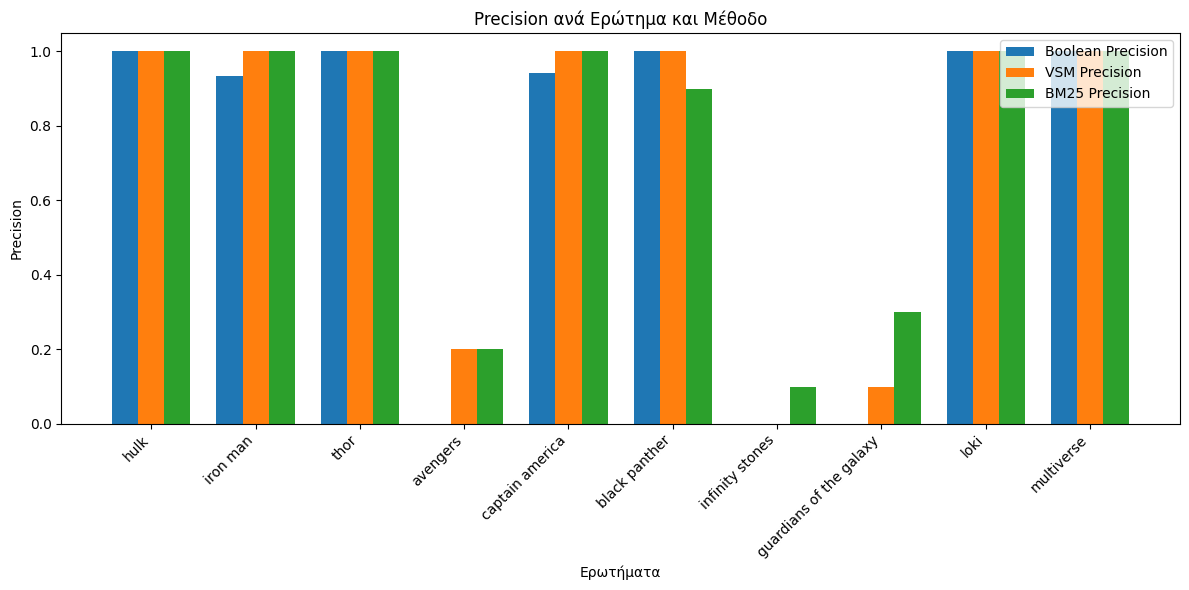

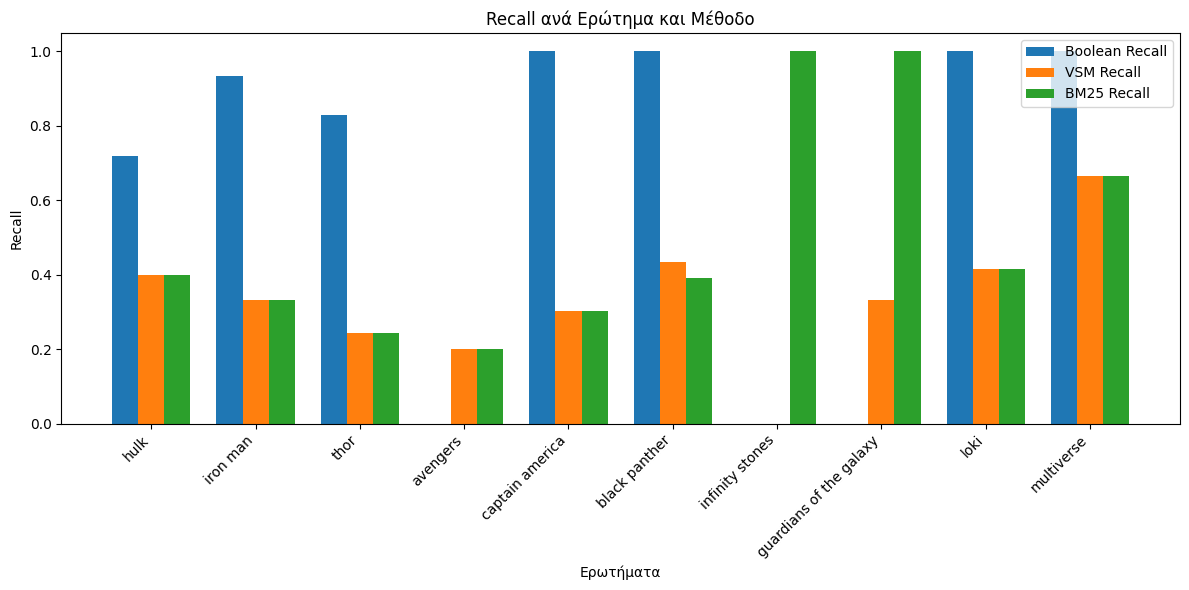

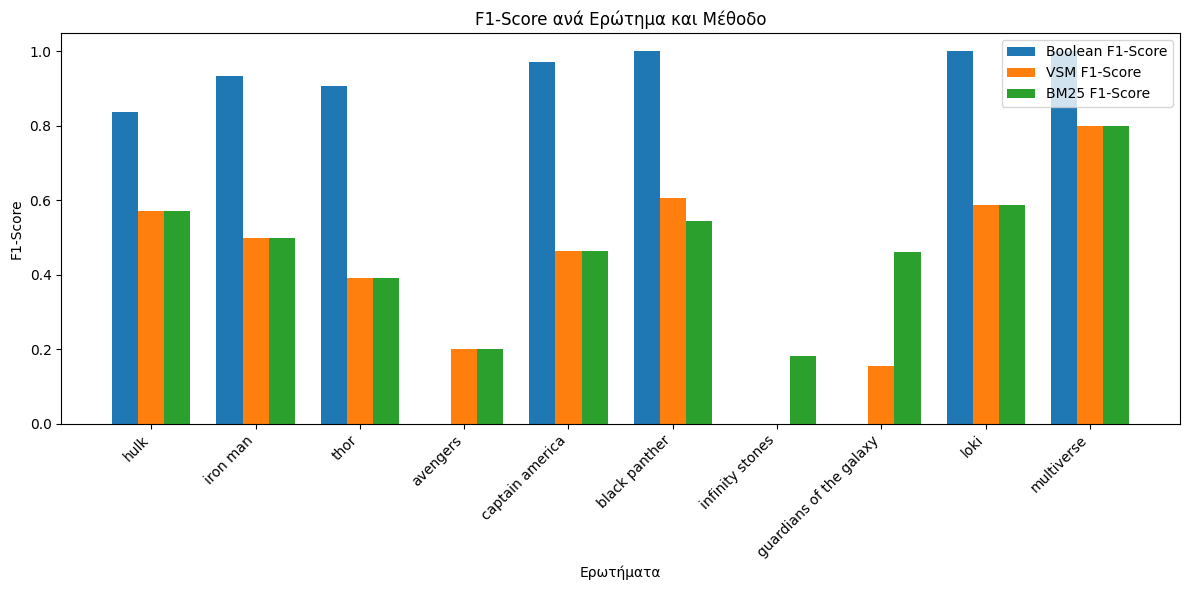

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Ενεργοποίηση inline γραφημάτων
%matplotlib inline

# Φόρτωση αποτελεσμάτων
with open('evaluation_results_with_map.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

results = data["results"]
map_scores = data["map_scores"]

# Λίστα ερωτημάτων
queries = list(results.keys())

# Μέθοδοι αναζήτησης
methods = ["Boolean", "VSM", "BM25"]

# Προετοιμασία δεδομένων για τα γραφήματα
precision_data = {method: [] for method in methods}
recall_data = {method: [] for method in methods}
f1_data = {method: [] for method in methods}

for query in queries:
    for method in methods:
        precision_data[method].append(results[query][method]["Precision"])
        recall_data[method].append(results[query][method]["Recall"])
        f1_data[method].append(results[query][method]["F1-Score"])

# Δημιουργία γραφημάτων
x = np.arange(len(queries))  # Θέσεις στον άξονα Χ
width = 0.25  # Πλάτος γραμμής

# Precision Graph
plt.figure(figsize=(12, 6))
plt.bar(x - width, precision_data["Boolean"], width, label="Boolean Precision")
plt.bar(x, precision_data["VSM"], width, label="VSM Precision")
plt.bar(x + width, precision_data["BM25"], width, label="BM25 Precision")

plt.title("Precision ανά Ερώτημα και Μέθοδο")
plt.xlabel("Ερωτήματα")
plt.ylabel("Precision")
plt.xticks(x, queries, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# Recall Graph
plt.figure(figsize=(12, 6))
plt.bar(x - width, recall_data["Boolean"], width, label="Boolean Recall")
plt.bar(x, recall_data["VSM"], width, label="VSM Recall")
plt.bar(x + width, recall_data["BM25"], width, label="BM25 Recall")

plt.title("Recall ανά Ερώτημα και Μέθοδο")
plt.xlabel("Ερωτήματα")
plt.ylabel("Recall")
plt.xticks(x, queries, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# F1-Score Graph
plt.figure(figsize=(12, 6))
plt.bar(x - width, f1_data["Boolean"], width, label="Boolean F1-Score")
plt.bar(x, f1_data["VSM"], width, label="VSM F1-Score")
plt.bar(x + width, f1_data["BM25"], width, label="BM25 F1-Score")

plt.title("F1-Score ανά Ερώτημα και Μέθοδο")
plt.xlabel("Ερωτήματα")
plt.ylabel("F1-Score")
plt.xticks(x, queries, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


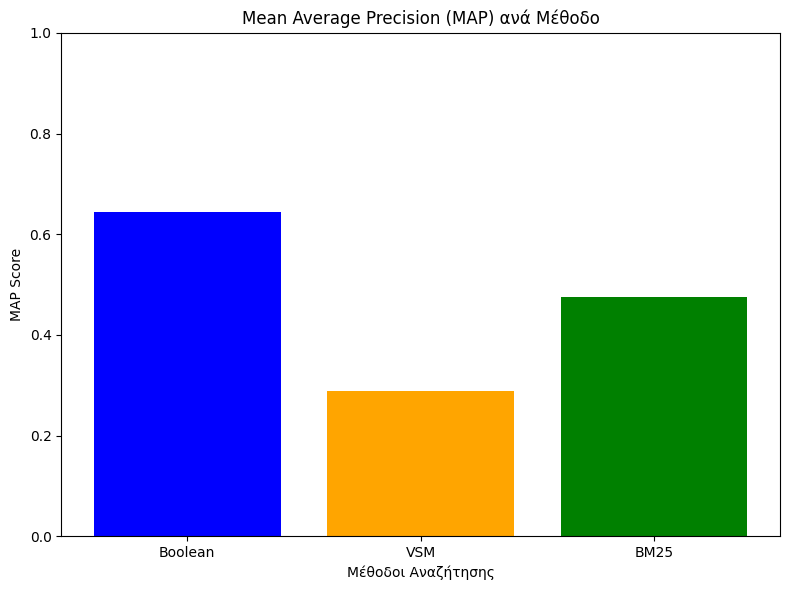

In [2]:
# MAP Graph
plt.figure(figsize=(8, 6))
plt.bar(map_scores.keys(), map_scores.values(), color=['blue', 'orange', 'green'])

plt.title("Mean Average Precision (MAP) ανά Μέθοδο")
plt.xlabel("Μέθοδοι Αναζήτησης")
plt.ylabel("MAP Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
